**TASK-3 : IRIS FLOWER CLASSIFICATION **

Author : Sayali Sudhakar Datir

Domain : Data Science

Aim : To develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
# Linking dataset into colab
import io
iris = pd.read_csv((io.BytesIO(uploaded['IRIS.csv'])))

In [4]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.shape

(150, 5)

**Data Preprocessing**

* In this project we have encoded the result column to numbers which makes easier for bulilding an algorithm over it.



In [6]:
# Checking Null Values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Importing libraries used for encoding

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [10]:
for i in iris.columns:
  if is_numeric_dtype(iris[i]):
    continue
  else:
    iris[i] = le.fit_transform(iris[i])

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Data Preprocessing**


*   In this analysis, We have used multiple charts to see the relationship between the features present in the dataset and to know about importance of columns which involves in the result.
  


<ipython-input-12-fb4968e1dd25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'species', data = iris, palette= "Set2")


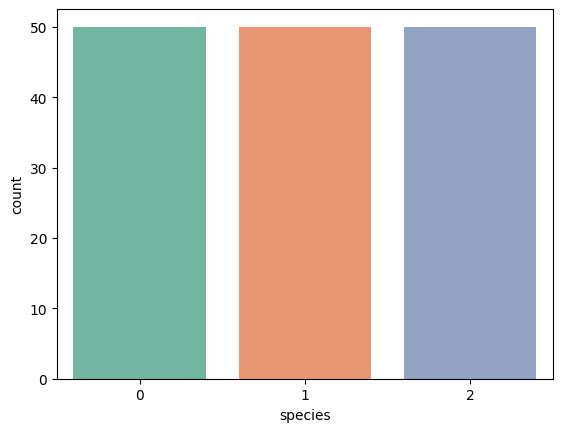

In [12]:
# Created a bar chart to see the count of species category

sns.countplot(x = 'species', data = iris, palette= "Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

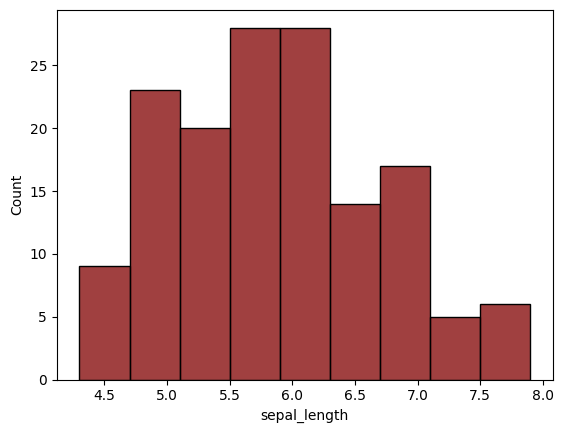

In [13]:
# Build a Histogram for sepal_length data to know the relation

sns.histplot(data = iris, x = iris.sepal_length, color = 'maroon' )

<Axes: xlabel='sepal_width', ylabel='Count'>

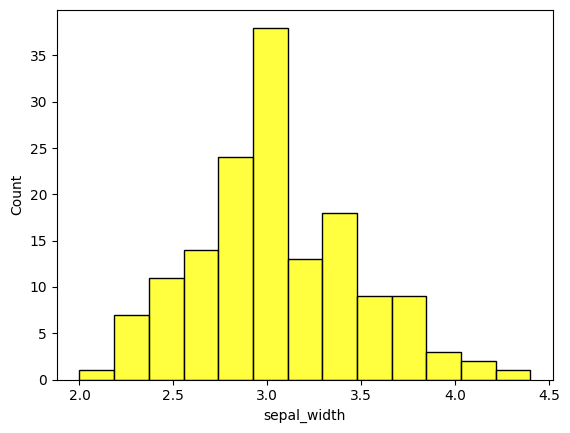

In [ ]:
# Build a Histogram for sepal_width data to know the relation

sns.histplot(data = iris, x = iris.sepal_width, color = 'yellow')

<Axes: xlabel='petal_length', ylabel='Count'>

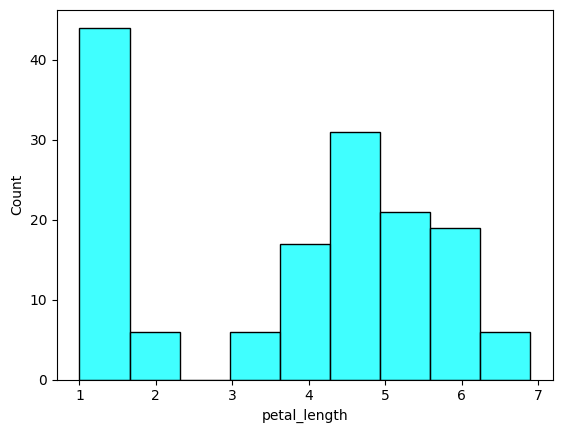

In [ ]:
# Build a Histogram for petal_length data to know the relation

sns.histplot(data = iris, x = iris.petal_length, color = 'aqua')

<Axes: xlabel='petal_width', ylabel='Count'>

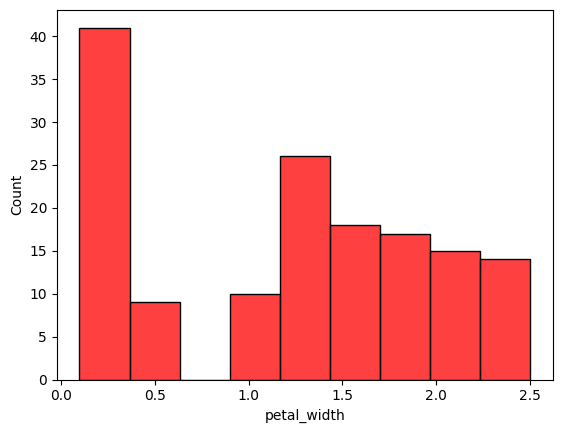

In [ ]:
# Build a Histogram for petal_width data to know the relation

sns.histplot(data = iris, x = iris.petal_width, color = 'red')

<Axes: >

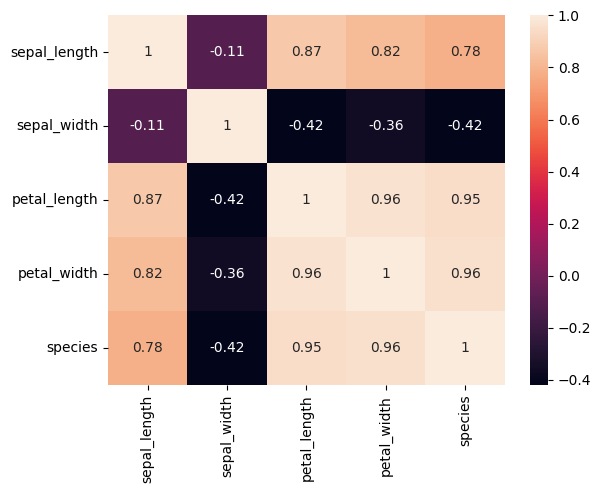

In [ ]:
# Created a heatmap to see the feature-wise correlation in the dataset

corr = iris.corr()
sns.heatmap(corr, annot = True)

**Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Assigning the predictor and target variable

X = iris.drop(['species'], axis = 1)
y = iris.species

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Model BUilding**

In [ ]:
# importing essential libraries for model building

from sklearn.linear_model import LogisticRegression

In [ ]:
# Building machine learning model and training them

Model = LogisticRegression()
Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evauating the modelto verify the accuracy

print("Score for Train data", Model.score(X_train, y_train))
print("Score for Test data", Model.score(X_test, y_test))

Score for Train data 0.9714285714285714
Score for Test data 0.9777777777777777


In [ ]:
# Importing essential libraries for Random forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Building machine learning model and training them

Model2 = RandomForestClassifier(n_estimators = 300, random_state = 100)
Model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [ ]:
# Evaluating the model to verify the accuracy

print("Score for Train data", Model2.score(X_train, y_train))
print("Score for Test data", Model2.score(X_test, y_test))

Score for Train data 1.0
Score for Test data 0.9777777777777777


In [ ]:
# knn k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and training them

Model3 = KNeighborsClassifier()
Model3.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
#Evaluating the model to verify the accuracy

print("Score for Train data",Model3.score(X_train, y_train))
print("Score for Test data",Model3.score(X_test, y_test))

Score for Train data 0.9714285714285714
Score for Test data 0.9777777777777777


* In the above process, we have tried building three models for the given dataset and evaluated every model performance using score.


1. At first, we have built a Model using Logistic Regression technique. As a result of the model we got Score for Train data as 0.9809523809523809 and
Score for Test data as 0.97, which shows this model works pretty well.
2. Upnext we tried Random Forest Classifier technique, it gives Scores for Train data as 1.0 and for Test data 0.95.
3. Finally we built model based on K-Nearest Neighbour, from the result of this model score are lesser than previous models as 0.95 for training data and 0.95 for testing data.

* As a result of these process, we found Random Forest Classifier algorithm has higher performance efficiency in train but Logistic Regression model has better accuracy in both Train and Test data.


**Model Testing**

In [ ]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate

data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)

In [ ]:
# Predict the movie rating by entered data
result = Model.predict(trail)

# Display the predicted result from the Model
print("Result Species:", result[0])

Result Species: 0
